## IMPORT LIBRARIES

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.cluster import KMeans
from Algorithm import Kmeans_Algorithm

# !pip install openpy

## EDA

In [16]:
# dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

data = pd.read_csv('E:\CODE\Hệ Thống thông minh\BTL\Data\Data.csv')
data.head(10)

,STT,Tên,Mã Sinh Viên,Ngày Sinh,Lớp,Điểm trung bình(hệ 10),GPA,Điểm rèn luyện
0,1,Bùi Quốc Linh,B21DCCN800,1/1/2002,D21CQCN01,9.63,3.93,97
1,2,Phan Đình Tuấn,B21DCCN560,3/4/2002,D21CQCN02,7.12,2.81,95
2,3,Trần Thanh Khang,B21DCCN510,6/18/1998,D21CQCN15,5.12,1.59,75
3,4,Vũ Văn Huy,B21DCCN883,11/1/2001,D21CQCN01,8.09,3.42,62
4,5,Nguyễn Anh Linh,B21DCCN776,8/13/1998,D21CQCN20,7.75,2.94,71
5,6,Nguyễn Khánh Dương,B21DCCN751,8/4/2002,D21CQCN13,4.99,1.55,61
6,7,Phạm Anh Bình,B21DCCN147,1/7/1998,D21CQCN19,7.61,2.94,82
7,8,Lê Quốc Tuấn,B21DCCN784,1/24/2000,D21CQCN07,7.33,2.92,64
8,9,Bùi Khánh Quang,B21DCCN947,9/6/2001,D21CQCN14,7.01,2.92,41
9,10,Bùi Thanh Linh,B21DCCN516,8/17/2002,D21CQCN10,7.06,3.00,63


### Box plot
_ biểu thị dữ liệu phân bố như nào, có đối xứng hay không, thể hiện qua các thông tin
* giá trị lớn nhât, nhỏ nhất
* median, q1, q3
* IQR: (tứ phân vị)khoảng từ q1-q3, biểu diễn mức độ phân tán của dữ liệu trung tâm
* các điểm bất thường: giá trị khác biệt so với các dữ liệu còn lại, có thể nằm ngoài khoảng IQR
    * VD: ngoài khoảng: [Q1-1.5*IQR; Q3+1.5*IQR]



In [17]:

data['Ngưỡng điểm'] = pd.cut(data['Điểm trung bình(hệ 10)'], 
                             bins=[0, 3, 6, 8, 10], labels=["0-3", "4-6", "7-8", "9-10"])
# print(data.head)
# Tạo box plot tương tác với plotly
fig = px.box(data, x='Ngưỡng điểm', y='Điểm rèn luyện', 
             title="Box Plot của điểm rèn luyện theo ngưỡng điểm",
             labels={'Ngưỡng điểm': 'Ngưỡng điểm', 'Điểm trung bình( hệ 10)': 'Điểm trung bình (hệ 10)'})

# Hiển thị biểu đồ
fig.show()

## RUN ALGORITHM


In [18]:
# Kiểm tra xem có bao nhiêu giá trị bị thiếu (NaN)
print(data[['Điểm trung bình(hệ 10)','Điểm rèn luyện' ,'GPA']].isna().sum())

Điểm trung bình(hệ 10)    0
Điểm rèn luyện            0
GPA                       0
dtype: int64


In [19]:
# Lấy 2 thuộc tính là Điểm trung bình và điểm rèn luyện để tiến hành phân cụm
X = data[['Điểm trung bình(hệ 10)','Điểm rèn luyện']].values

### K = 3

(500,)
2
[[ 7.52666667 48.92982456]
 [ 7.37841584 70.70792079]
 [ 7.4538587  81.72282609]]


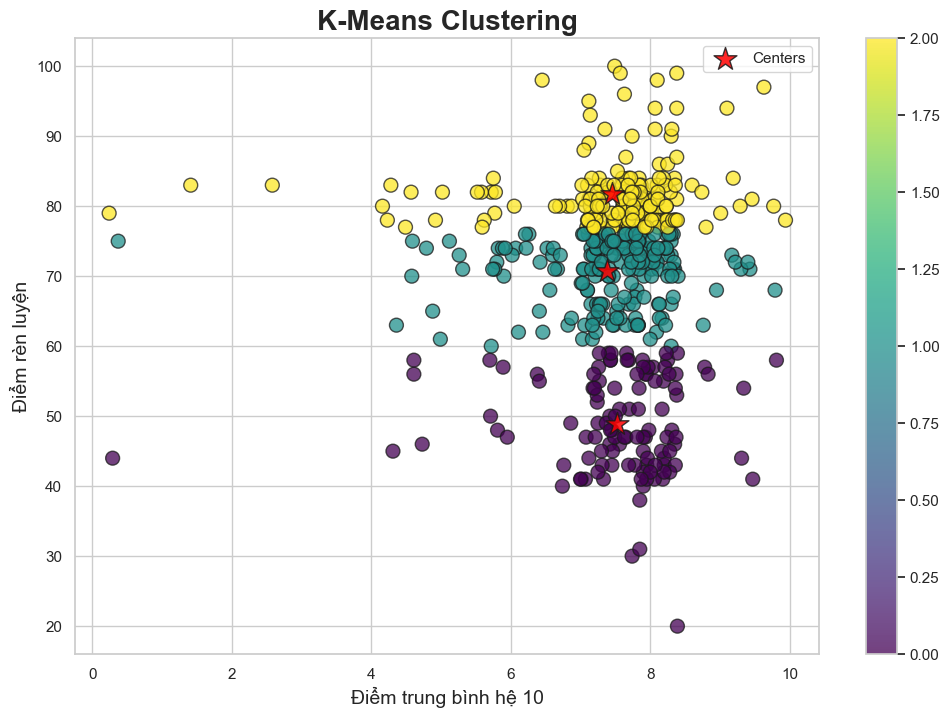

In [22]:

sns.set(style="whitegrid")

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans.shape)
print(y_kmeans[0])

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis', edgecolor='k', alpha=0.75)

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.85, marker='*', edgecolor='k', label='Centers')


plt.title("K-Means Clustering", fontsize=20, fontweight='bold')
plt.xlabel('Điểm trung bình hệ 10', fontsize=14)
plt.ylabel('Điểm rèn luyện', fontsize=14)


plt.legend(loc='best')

plt.colorbar(scatter)
plt.show()


In [23]:
# Giả sử df chứa thông tin điểm và tên sinh viên
# Dữ liệu: 'Điểm trung bình(hệ 10)', 'GPA', 'Tên'

# Gắn kết quả phân cụm vào dataframe
data['Cluster'] = y_kmeans  

# Tính toán tọa độ của các trung tâm cụm
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Điểm trung bình(hệ 10)','Điểm rèn luyện'])
centers['Cluster'] = range(len(centers))  # Thêm cột Cluster để tương ứng với số cụm

# Vẽ biểu đồ tương tác với Plotly
fig = px.scatter(
    data,
    x='Điểm trung bình(hệ 10)',
    y='Điểm rèn luyện',
    color='Cluster',
    symbol ='Cluster',
    hover_name='Tên ',  # Hiển thị tên sinh viên khi trỏ chuột
    hover_data=['Điểm trung bình(hệ 10)', 'GPA'],  # Hiển thị thêm điểm
    title="Phân cụm K-Means của kết quả học tập"
)

# Thêm các điểm trung tâm vào biểu đồ
fig.add_scatter(
    x=centers['Điểm trung bình(hệ 10)'],
    y=centers['Điểm rèn luyện'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='star'),
    name='Centroids'  # Tên hiển thị cho điểm trung tâm
)

fig.update_layout(
    legend=dict(
        x=0, y=0,  
        font=dict(size=10, color="black")
    ),
) 
# Hiển thị biểu đồ
fig.show()


### K = 4

[[ 7.46691489 60.53191489]
 [ 7.42422886 74.14427861]
 [ 7.42552239 83.25373134]
 [ 7.47619718 44.35211268]]


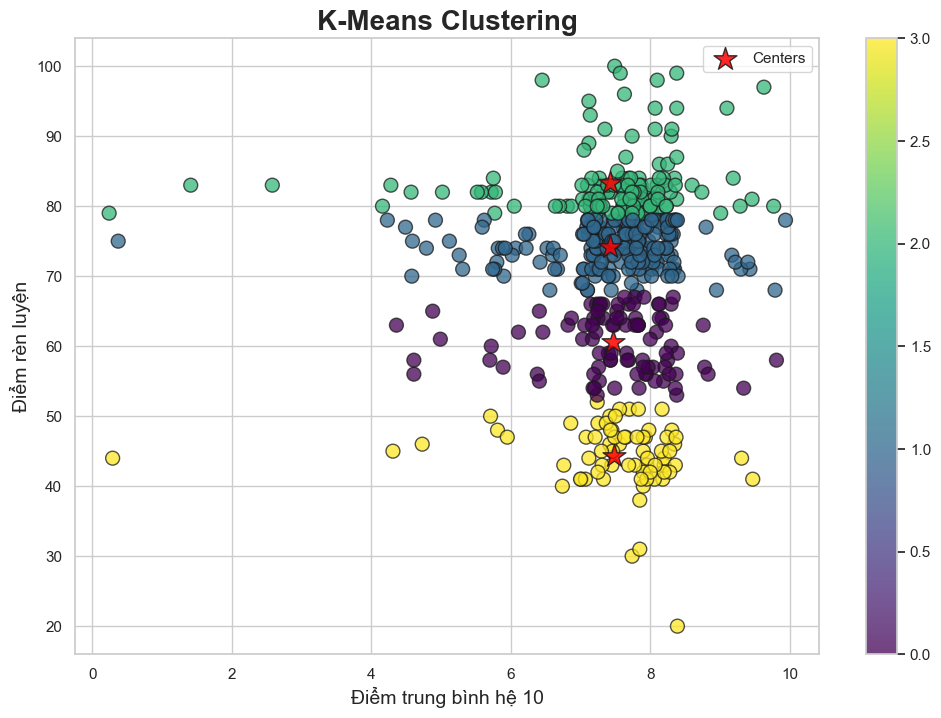

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis', edgecolor='k', alpha=0.75)

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.85, marker='*', edgecolor='k', label='Centers')


plt.title("K-Means Clustering", fontsize=20, fontweight='bold')
plt.xlabel('Điểm trung bình hệ 10', fontsize=14)
plt.ylabel('Điểm rèn luyện', fontsize=14)


plt.legend(loc='best')

plt.colorbar(scatter)
plt.show()


In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Gắn kết quả phân cụm vào dataframe
data['Cluster'] = y_kmeans  

# Tính toán tọa độ của các trung tâm cụm
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Điểm trung bình(hệ 10)','Điểm rèn luyện'])
centers['Cluster'] = range(len(centers))  # Thêm cột Cluster để tương ứng với số cụm

# Vẽ biểu đồ tương tác với Plotly
fig = px.scatter(
    data,
    x='Điểm trung bình(hệ 10)',
    y='Điểm rèn luyện',
    color='Cluster',
    symbol ='Cluster',
    hover_name='Tên ',  # Hiển thị tên sinh viên khi trỏ chuột
    hover_data=['Điểm trung bình(hệ 10)', 'GPA'],  # Hiển thị thêm điểm
    title="Phân cụm K-Means của kết quả học tập"
)

# Thêm các điểm trung tâm vào biểu đồ
fig.add_scatter(
    x=centers['Điểm trung bình(hệ 10)'],
    y=centers['Điểm rèn luyện'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='star'),
    name='Centroids'  # Tên hiển thị cho điểm trung tâm
)

fig.update_layout(
    legend=dict(
        x=0, y=0,  
        font=dict(size=10, color="black")
    ),
) 
# Hiển thị biểu đồ
fig.show()


### K = 5

In [28]:
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
print(centers)

# Gắn kết quả phân cụm vào dataframe
data['Cluster'] = y_kmeans  

# Tính toán tọa độ của các trung tâm cụm
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Điểm trung bình(hệ 10)','Điểm rèn luyện'])
centers['Cluster'] = range(len(centers))  # Thêm cột Cluster để tương ứng với số cụm

# Vẽ biểu đồ tương tác với Plotly
fig = px.scatter(
    data,
    x='Điểm trung bình(hệ 10)',
    y='Điểm rèn luyện',
    color='Cluster',
    symbol ='Cluster',
    hover_name='Tên ',  # Hiển thị tên sinh viên khi trỏ chuột
    hover_data=['Điểm trung bình(hệ 10)', 'GPA'],  # Hiển thị thêm điểm
    title="Phân cụm K-Means của kết quả học tập"
)

# Thêm các điểm trung tâm vào biểu đồ
fig.add_scatter(
    x=centers['Điểm trung bình(hệ 10)'],
    y=centers['Điểm rèn luyện'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='star'),
    name='Centroids'  # Tên hiển thị cho điểm trung tâm
)

fig.update_layout(
    legend=dict(
        x=0, y=0,  
        font=dict(size=10, color="black")
    ),
) 
# Hiển thị biểu đồ
fig.show()

[[ 7.55433962 55.75471698]
 [ 7.38956522 74.80193237]
 [ 7.46720339 83.83050847]
 [ 7.48698413 43.53968254]
 [ 7.40949153 64.81355932]]


### Elbow

[90879.08909980001, 25218.77896443387, 14900.309440387406, 8777.448390608166, 7102.297015097439, 4368.002622711736]


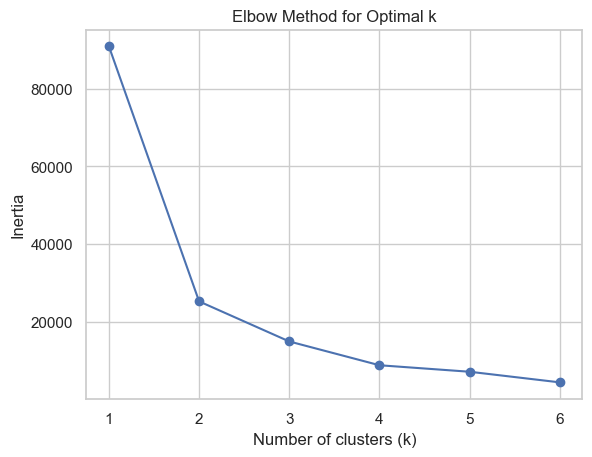

In [32]:
# Chạy KMeans với nhiều giá trị k khác nhau
inertia = []
k_values = range(1, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Lưu giá trị inertia

print(inertia)

# Vẽ đồ thị Elbow
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()